In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
! kaggle datasets download -d nilanjandebnath/webpage-elements-annotated-data

 92% 169M/184M [00:01<00:00, 169MB/s]
100% 184M/184M [00:01<00:00, 151MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/webpage-elements-annotated-data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
!nvidia-smi

Sat Apr 20 13:59:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
! pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 11.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [6]:
from ultralytics import YOLO
import os
from IPython.display import display , Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.5/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.2.1+cu121>=1.8.0
torchvision         ✅ 0.17.1+cu121>=0.9.0
tqdm                ✅ 4.66.2>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


In [7]:
# Train our model using YOLO8m
!yolo task=detect mode=train model=yolov8m.pt data='/content/Webpage elements detection/data.yaml' epochs=9 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 219MB/s]
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Webpage elements detection/data.yaml, epochs=9, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

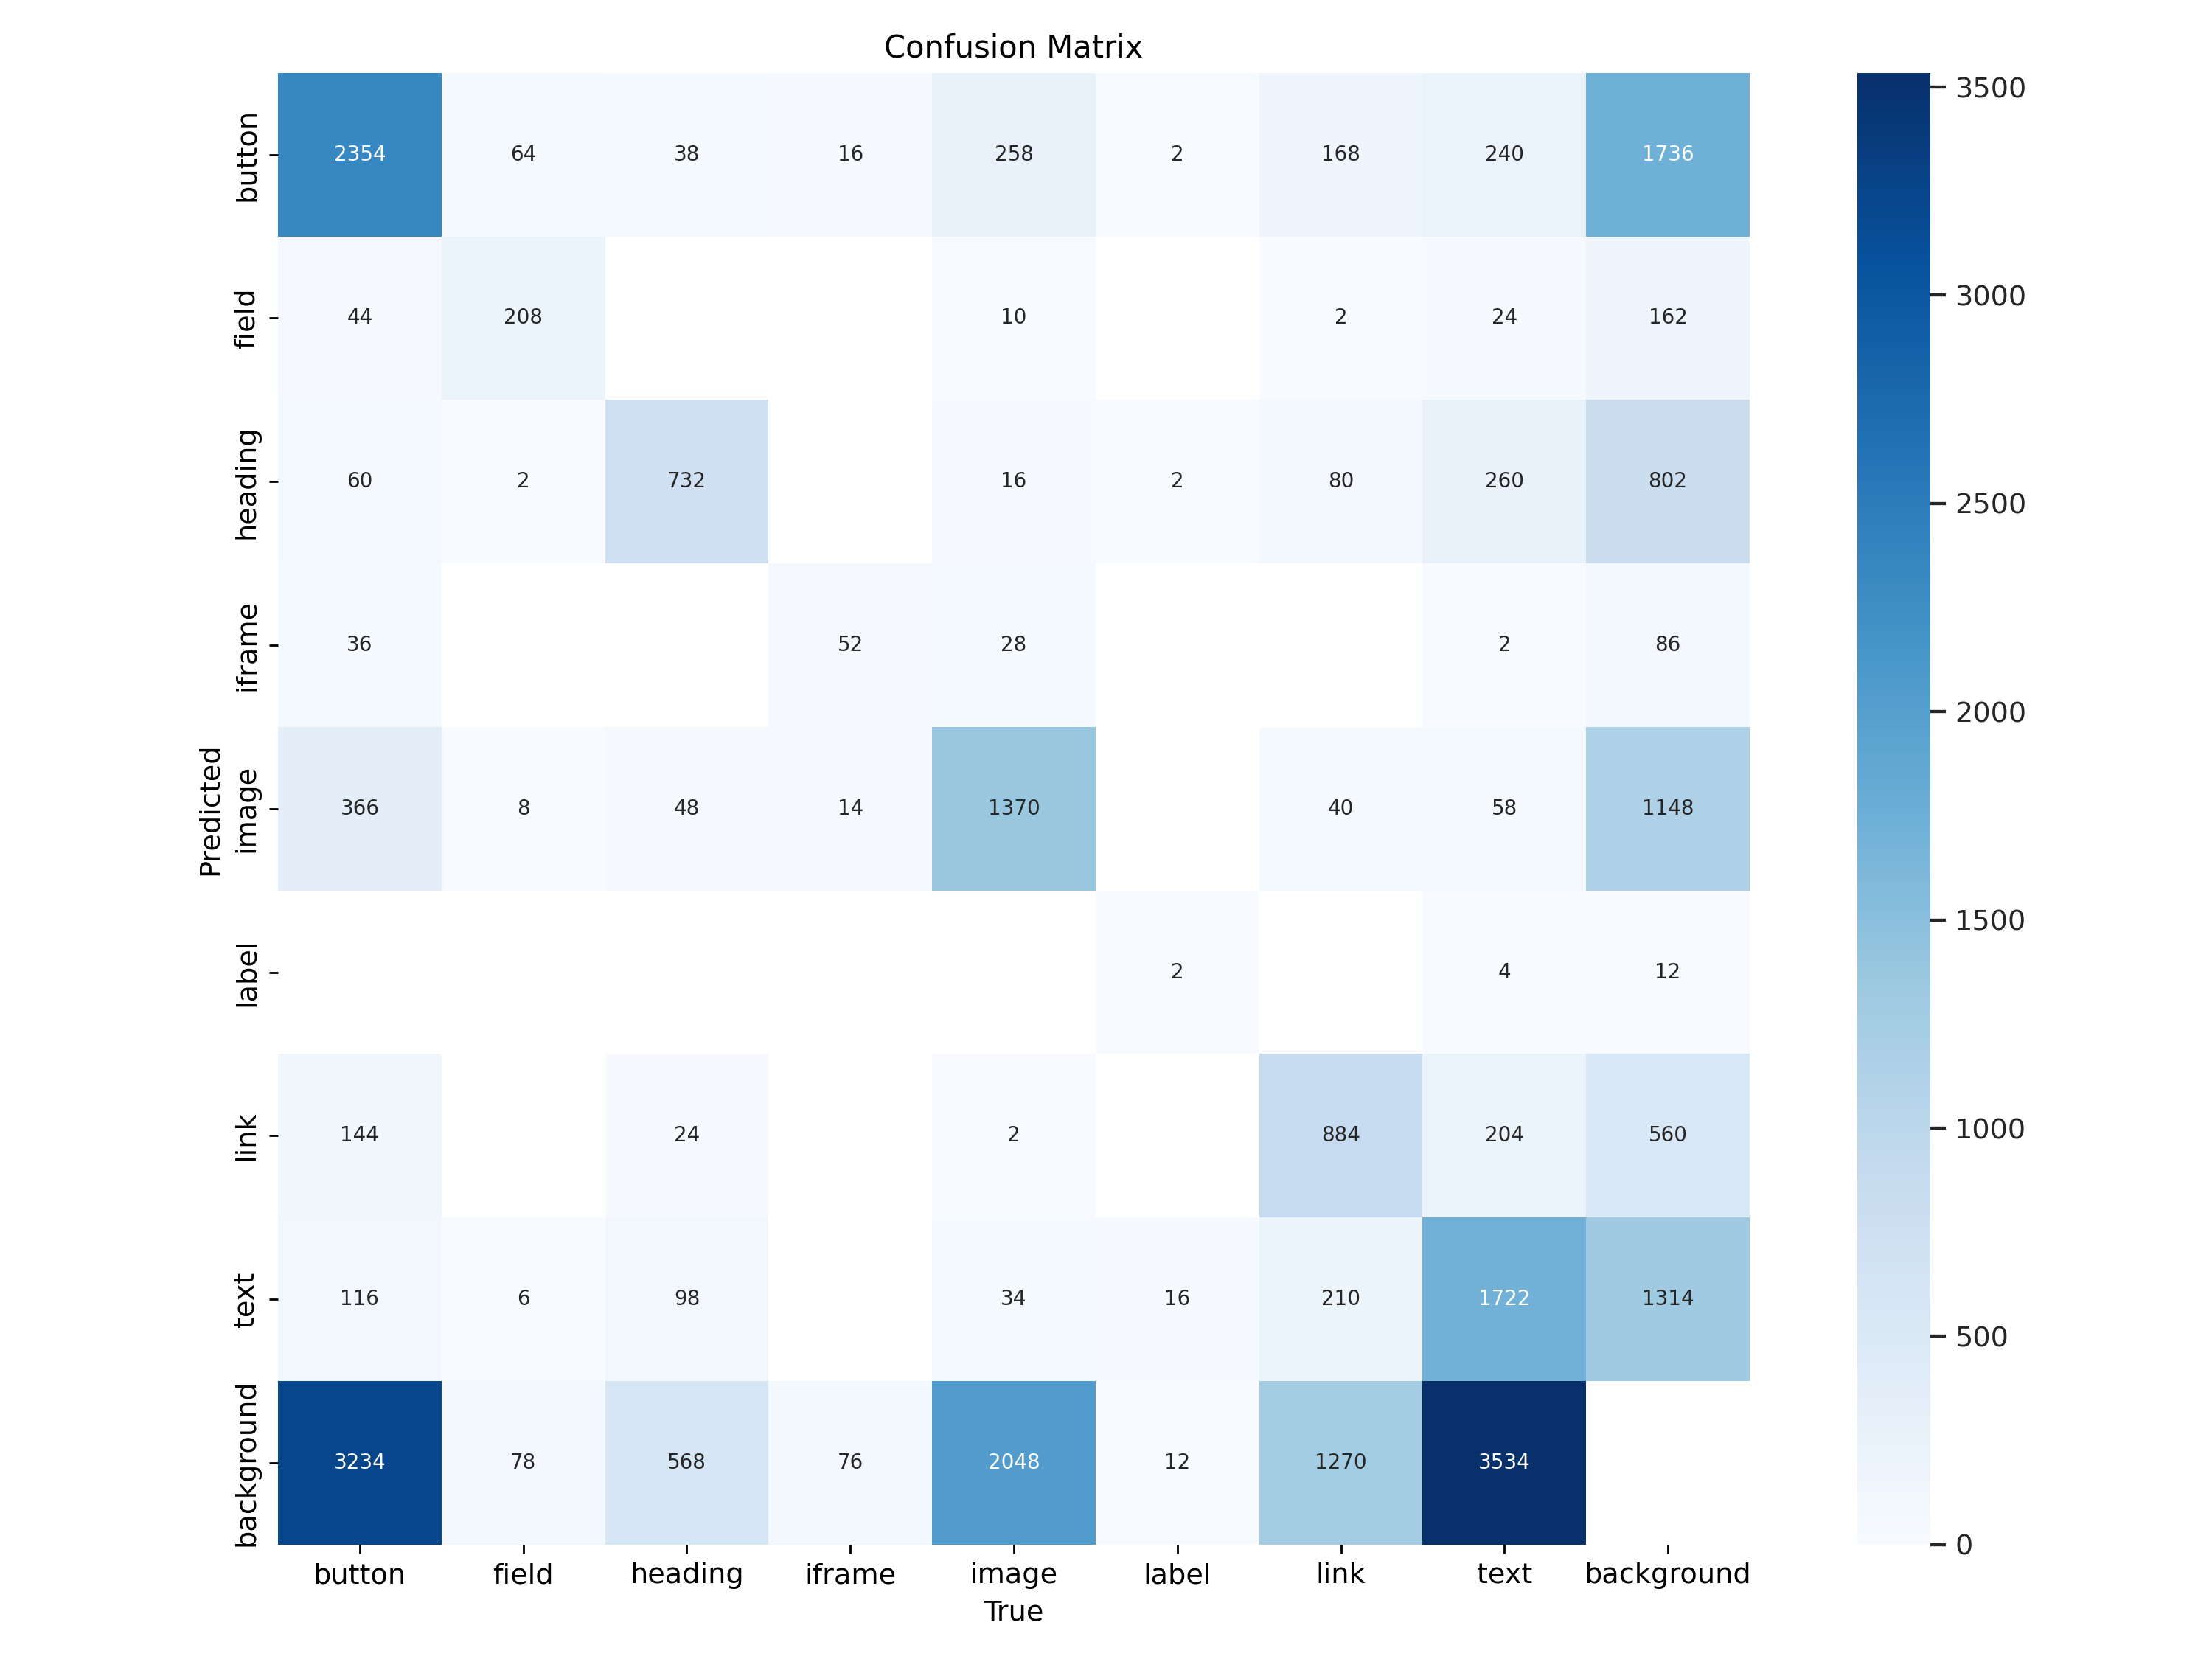

In [9]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png',width=700)

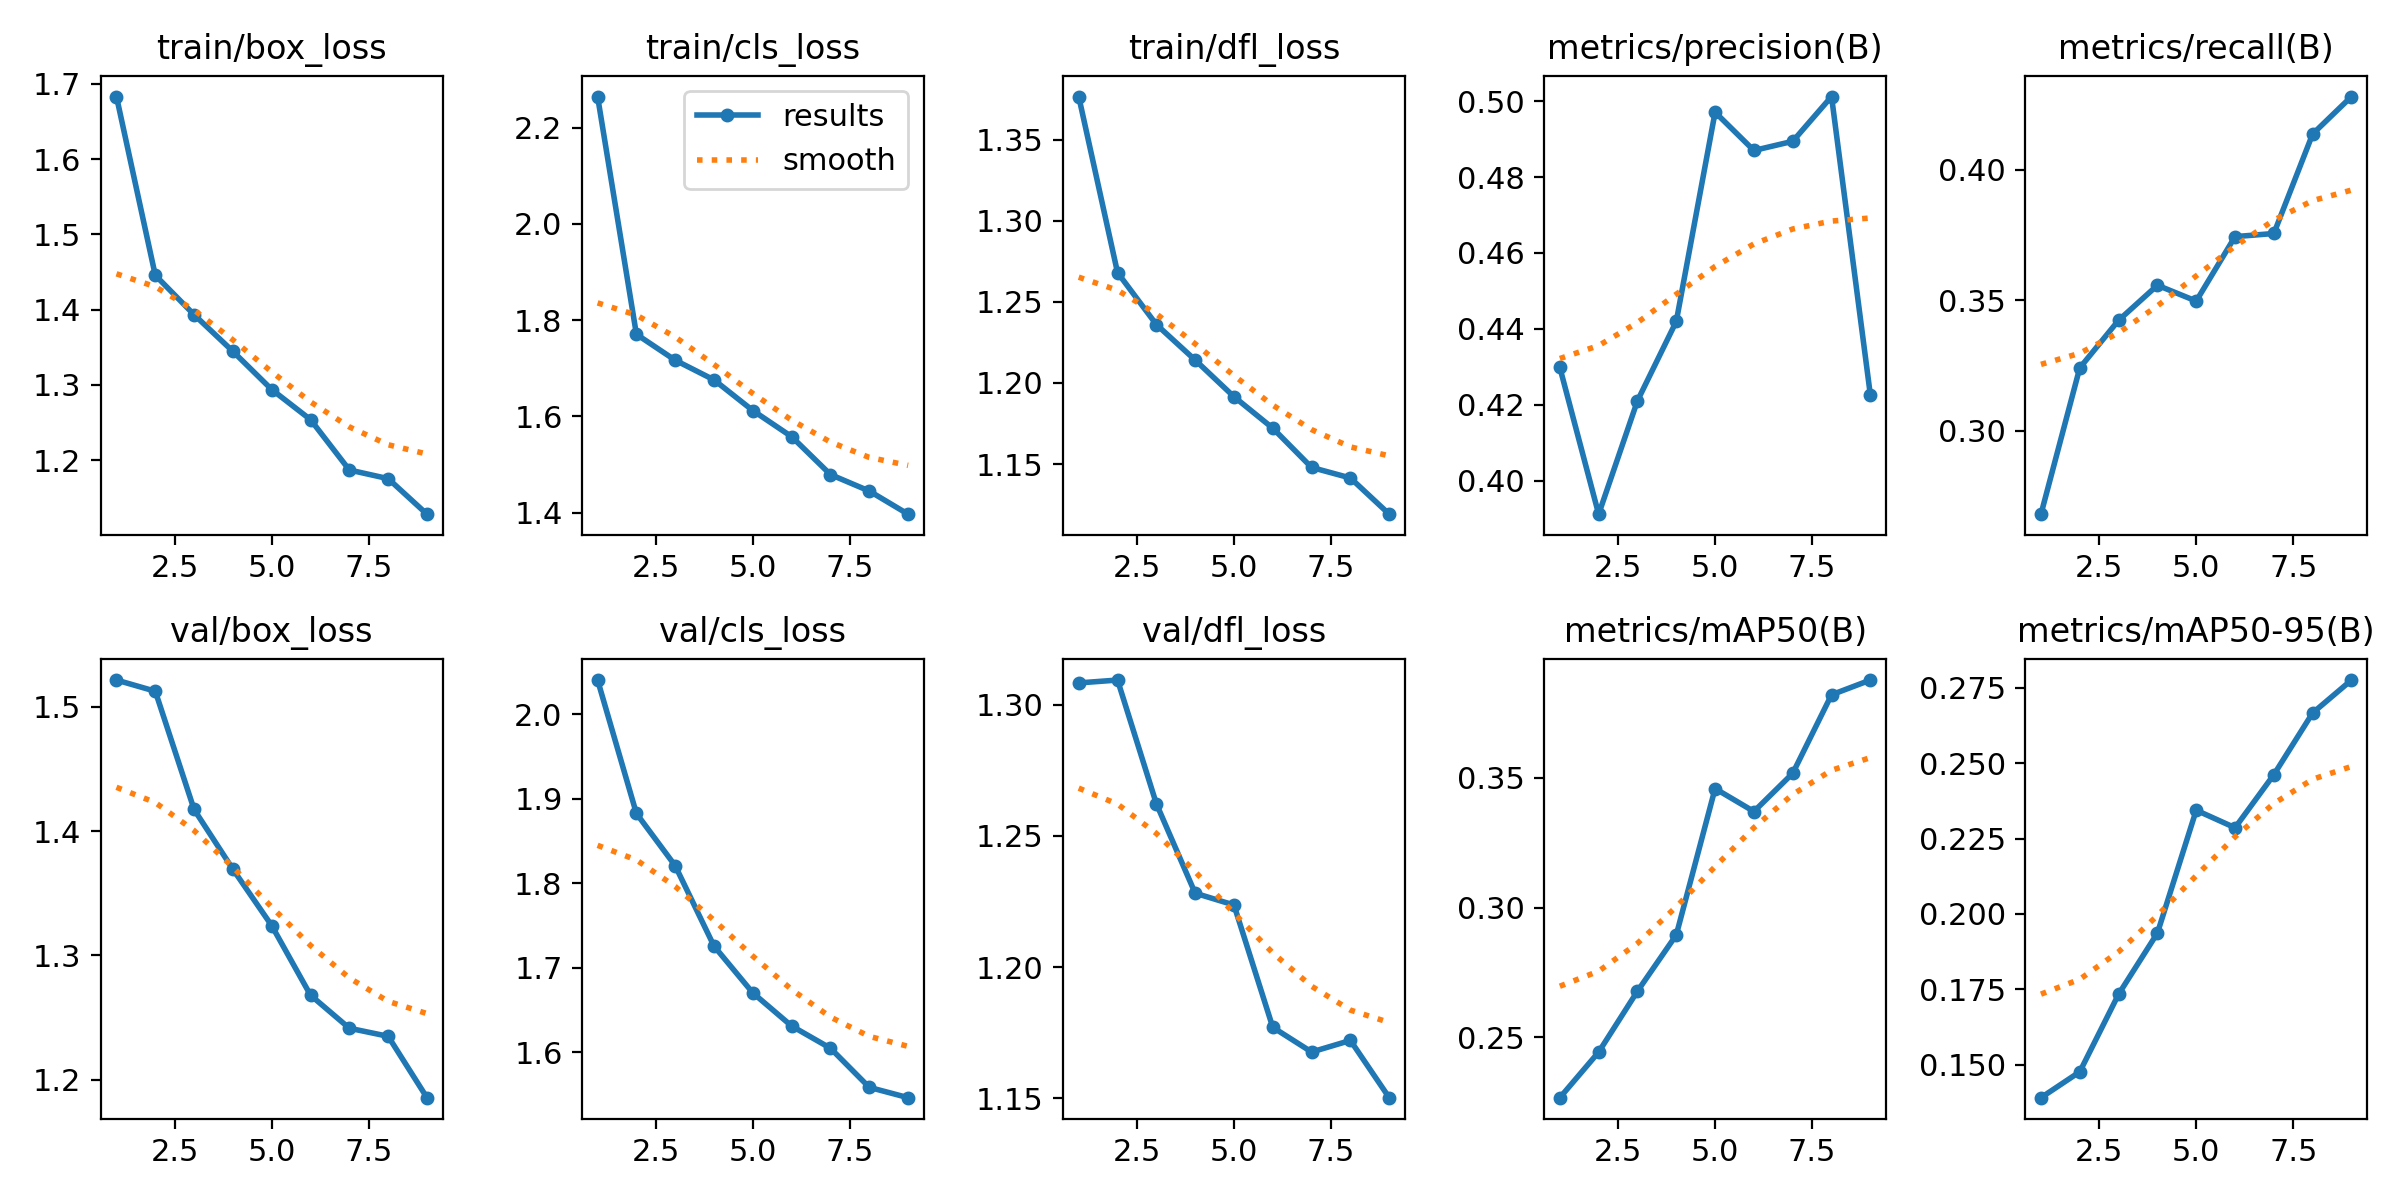

In [10]:
Image(filename=f'/content/runs/detect/train/results.png',width=700)

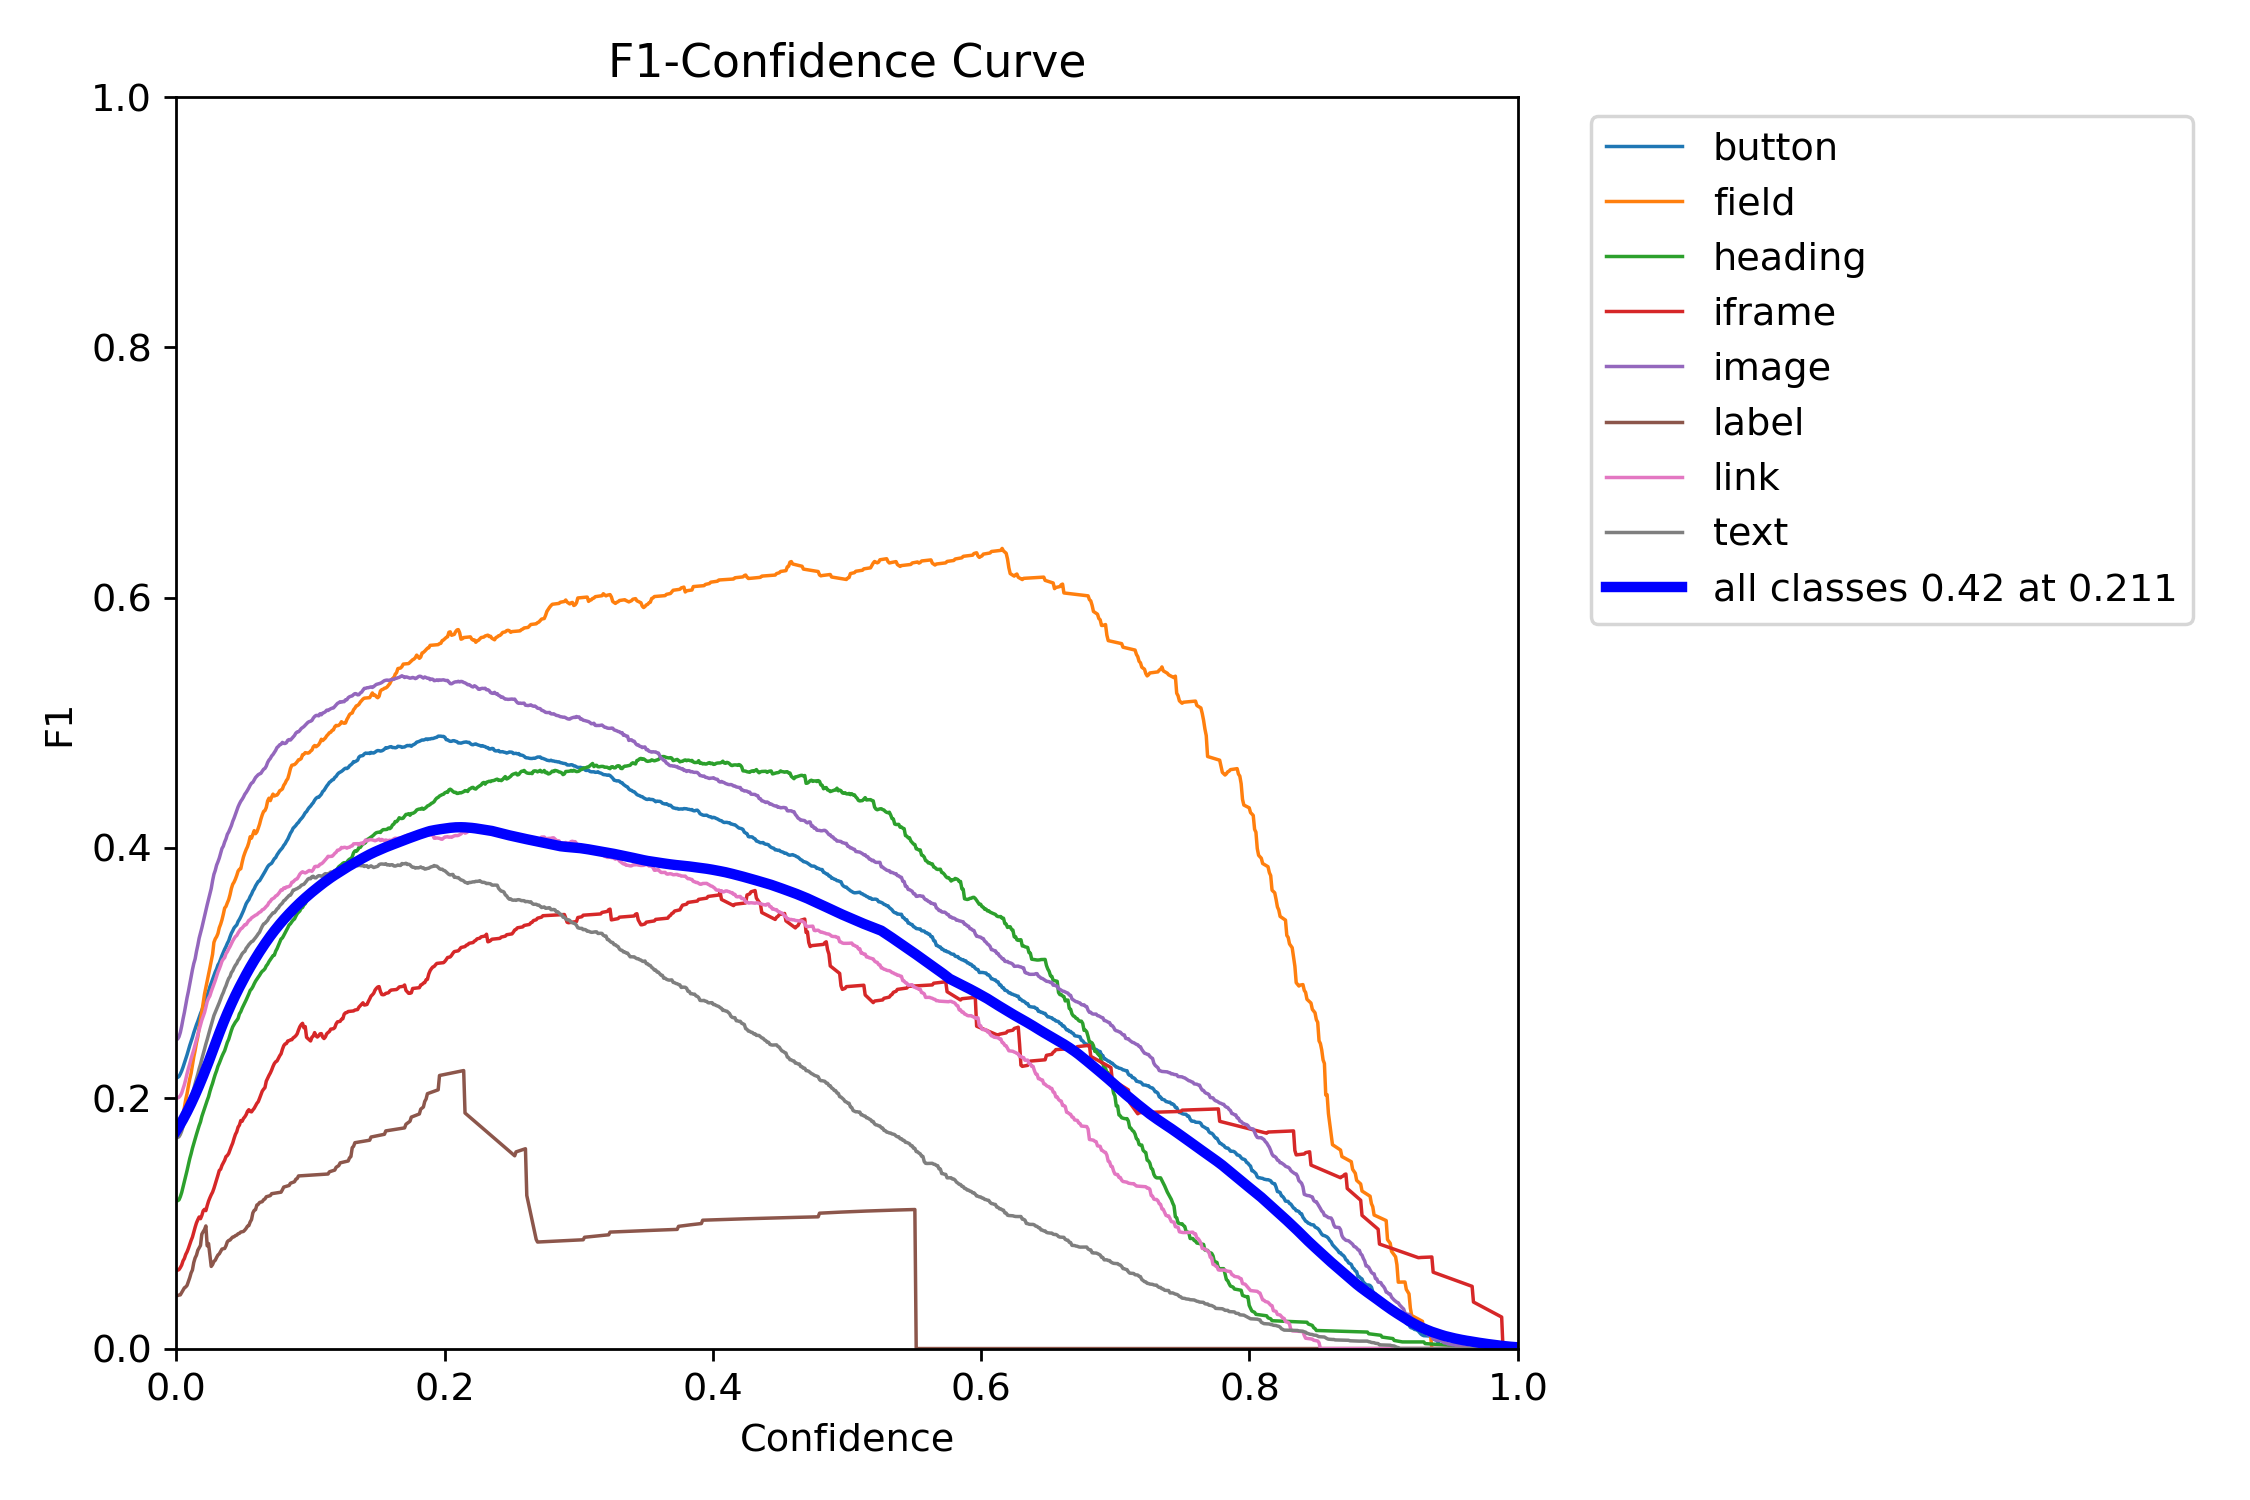

In [11]:
Image(filename=f'/content/runs/detect/train/F1_curve.png',width=700)

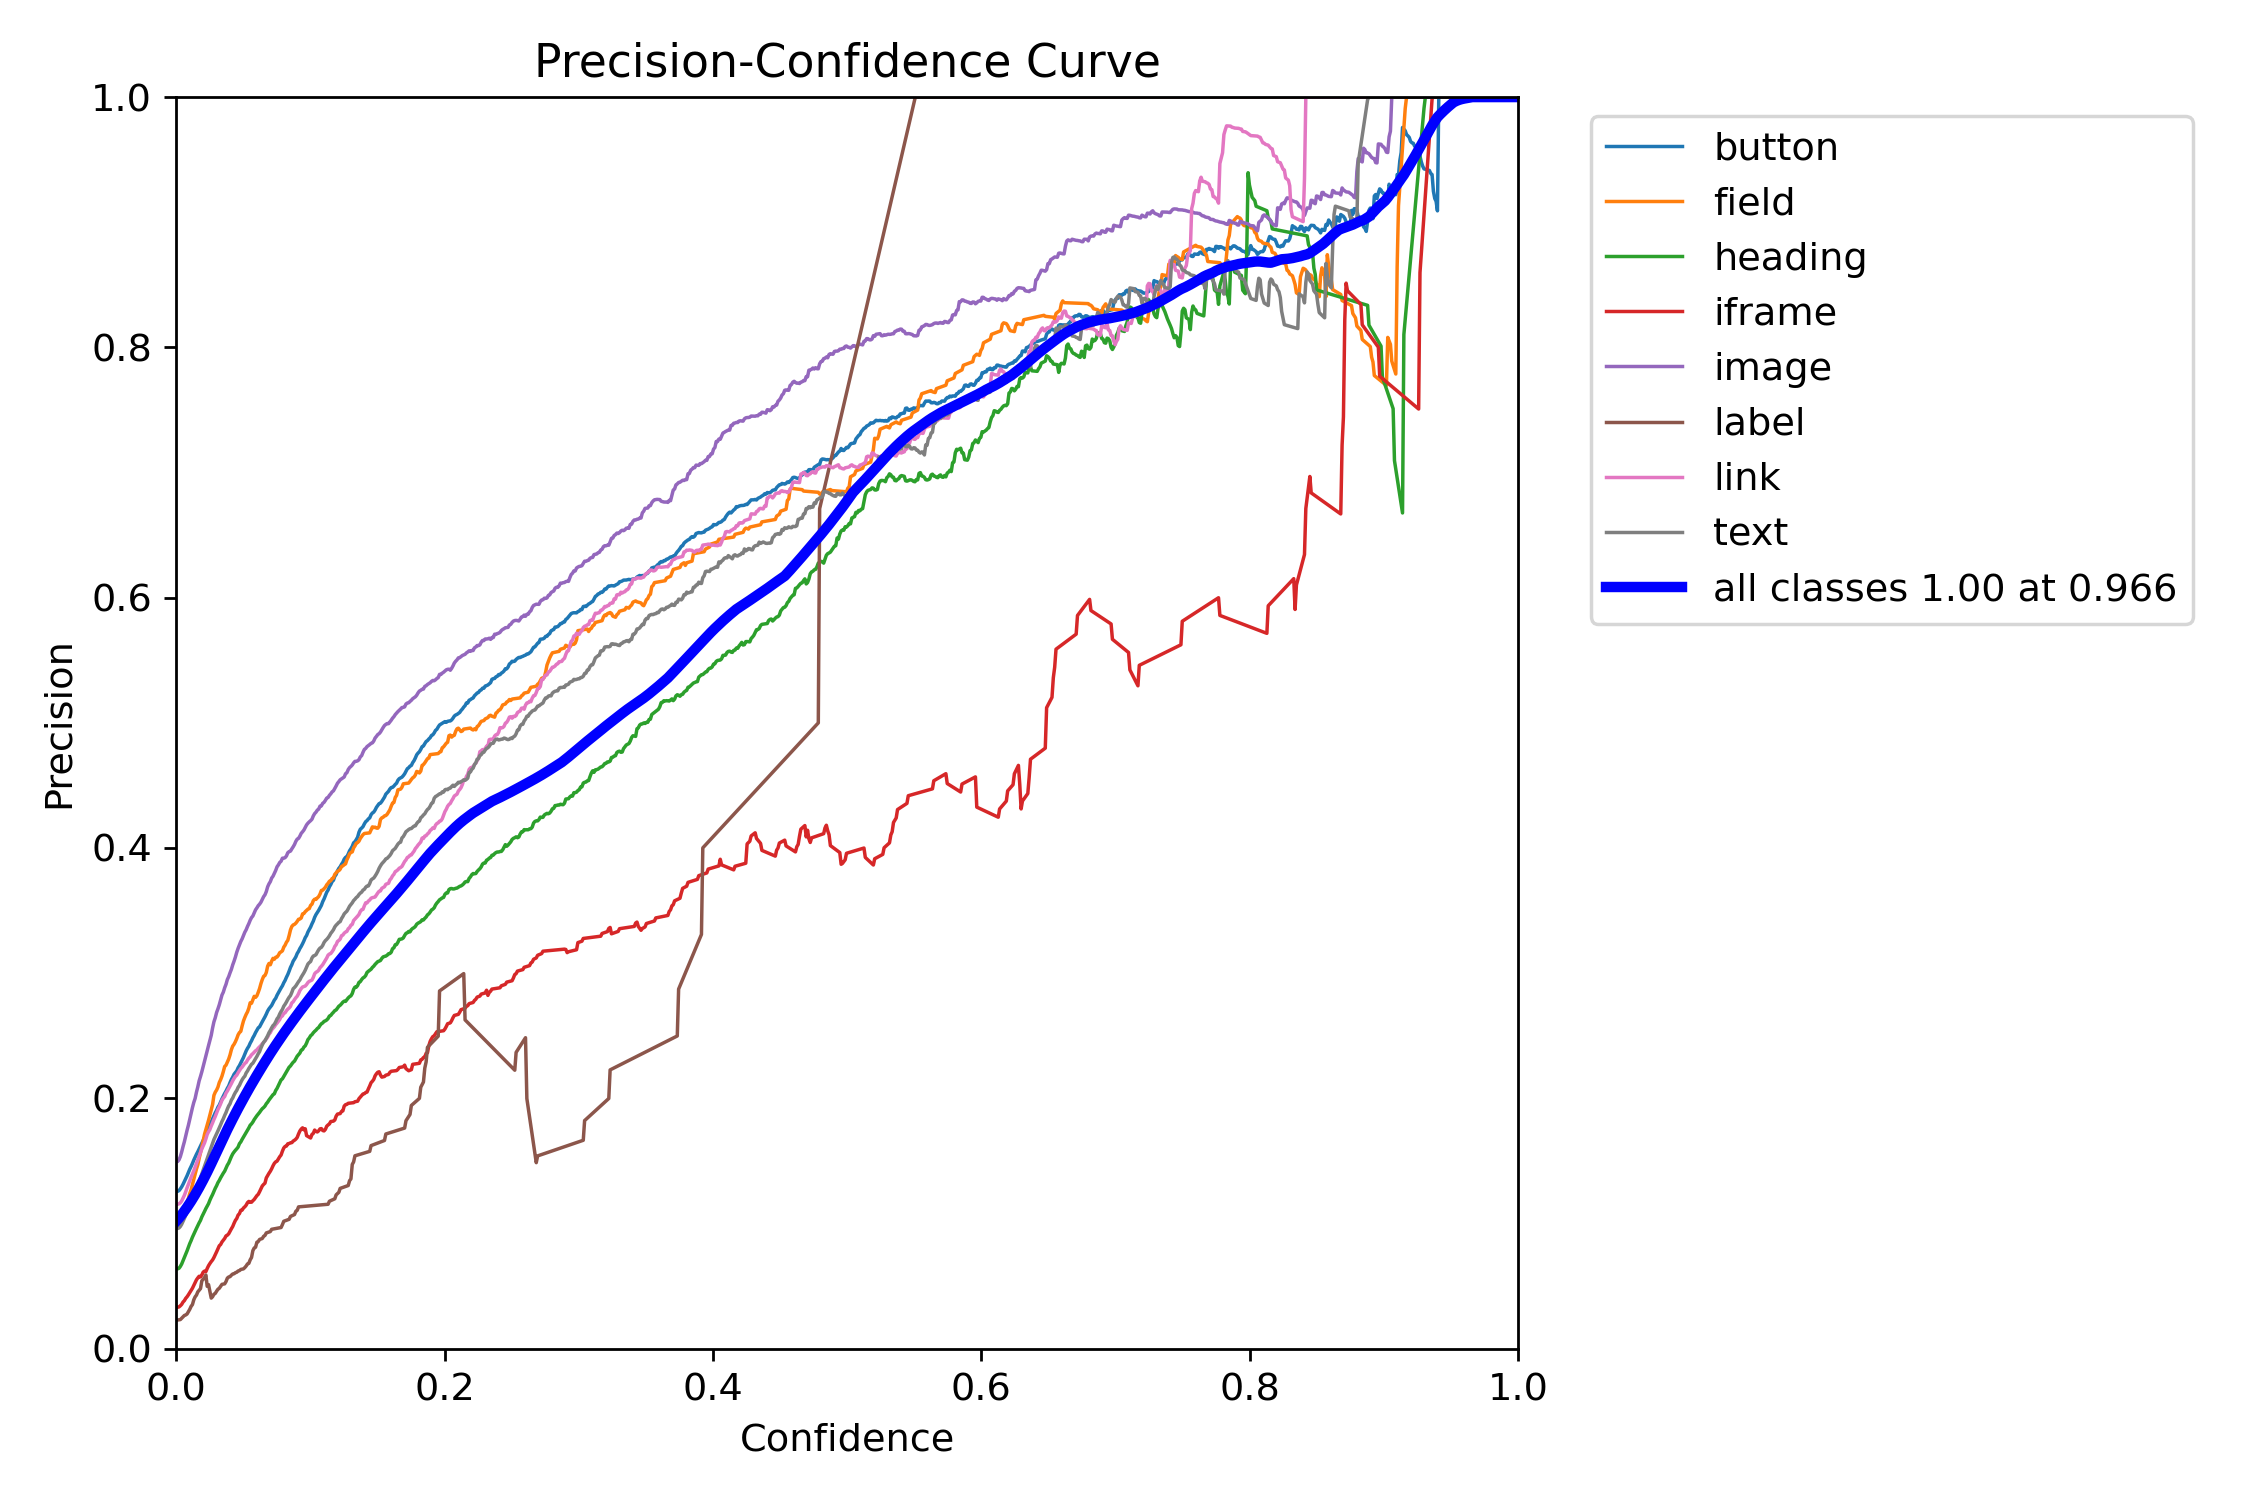

In [15]:
Image(filename=f'/content/runs/detect/train/P_curve.png',width=600)

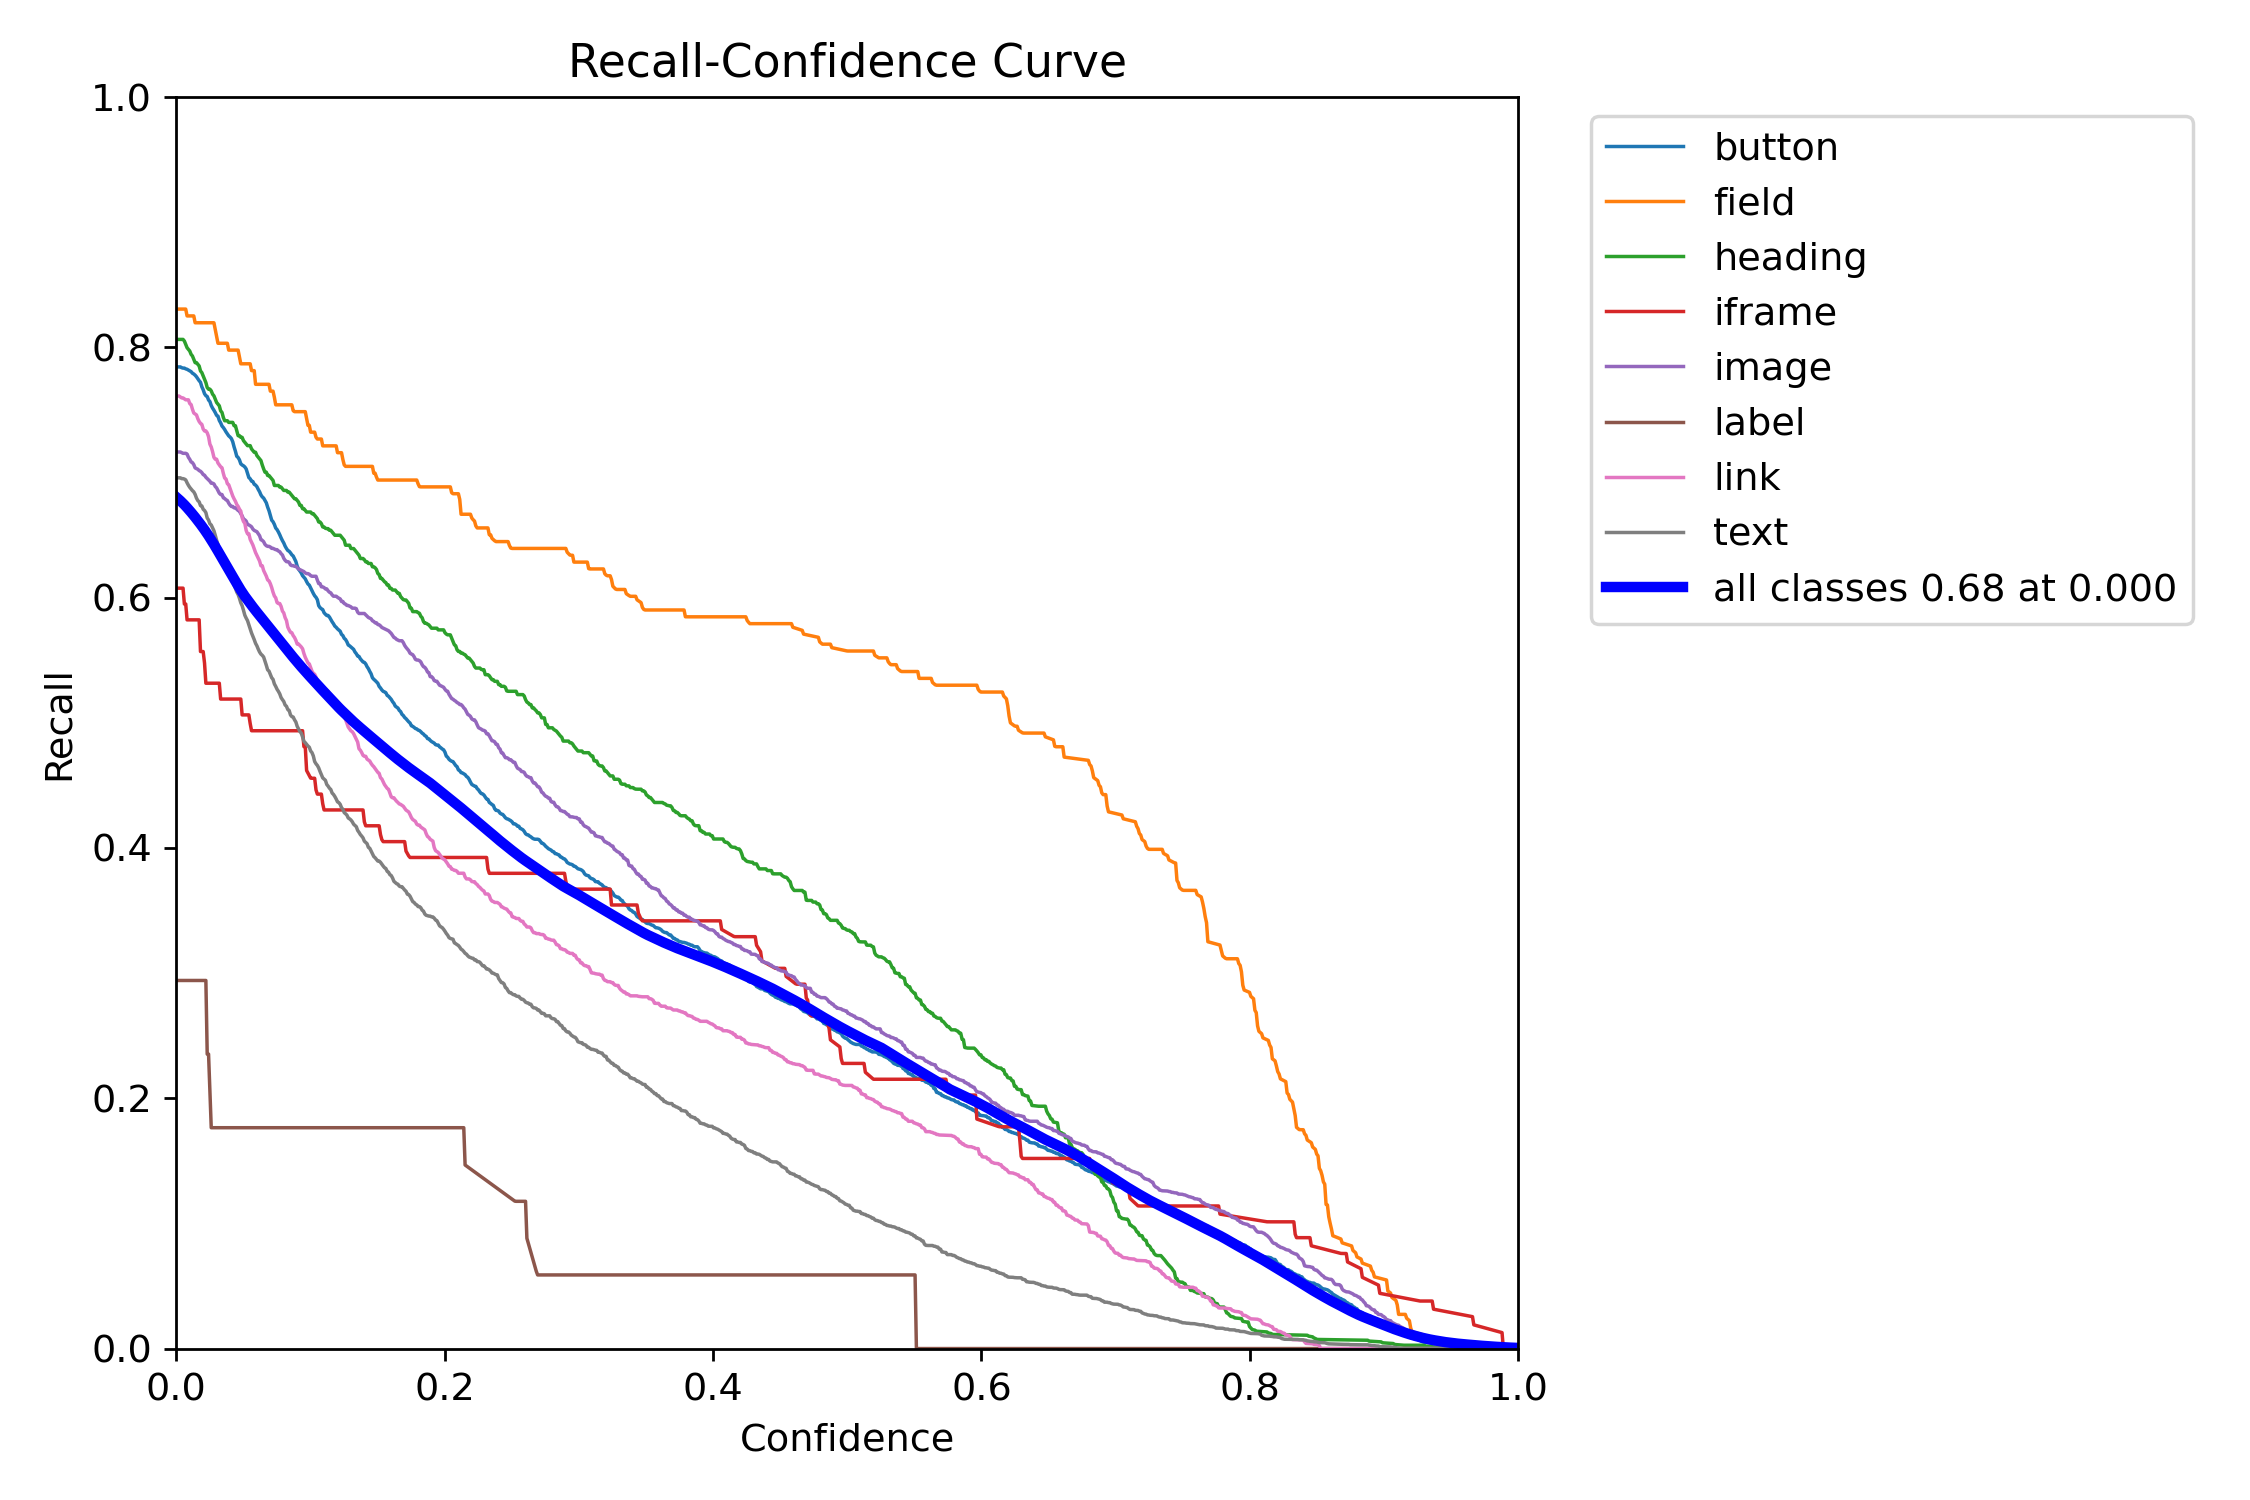

In [16]:
Image(filename=f'/content/runs/detect/train/R_curve.png', width=600)

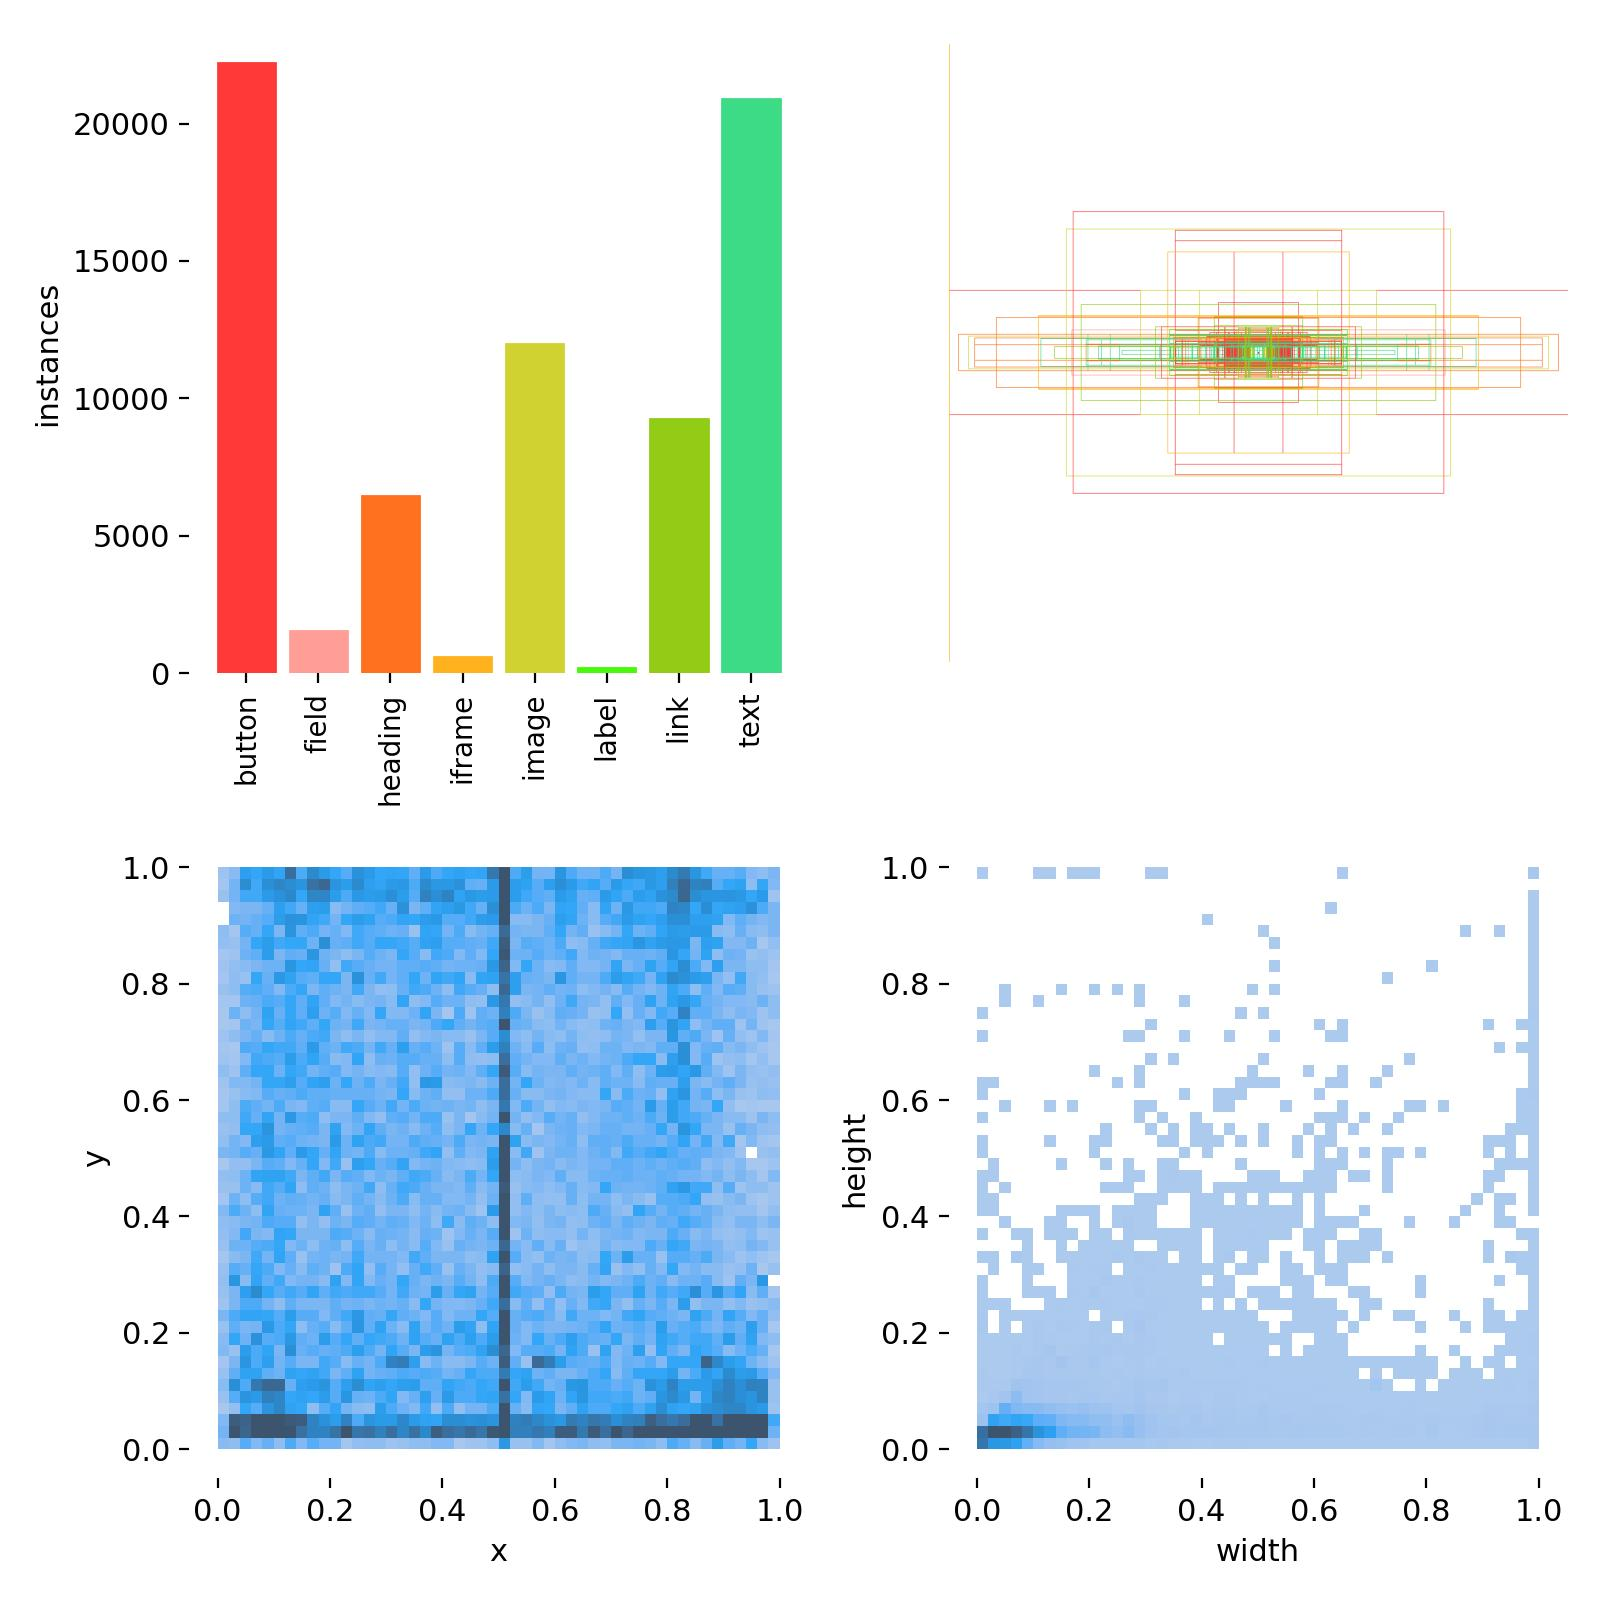

In [17]:
Image(filename=f'/content/runs/detect/train/labels.jpg',width=600)

# Test the model on Validation data

In [19]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data='/content/Webpage elements detection/data.yaml'

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25844392 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Webpage elements detection/valid/labels.cache... 482 images, 0 backgrounds, 0 corrupt: 100% 482/482 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/Webpage elements detection/valid/images/bandsintown_com_png.rf.I19VlDFncZ0RifJhmfEU.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/Webpage elements detection/valid/images/bandsintown_com_png.rf.b8462344187a5cdffe24d70019fabd0a.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/Webpage elements detection/valid/images/deondernemer_nl_png.rf.c00a7c65fab4356b887dea5c9e96e8f3.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/Webpage elements detection/valid/images/deondernemer_nl_png.rf.mVLu7hIaZ8VUCwbhSF6c.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/Webpage elements detection/valid/images/flickr_com_png.rf.27963e0183770e78d58a8b

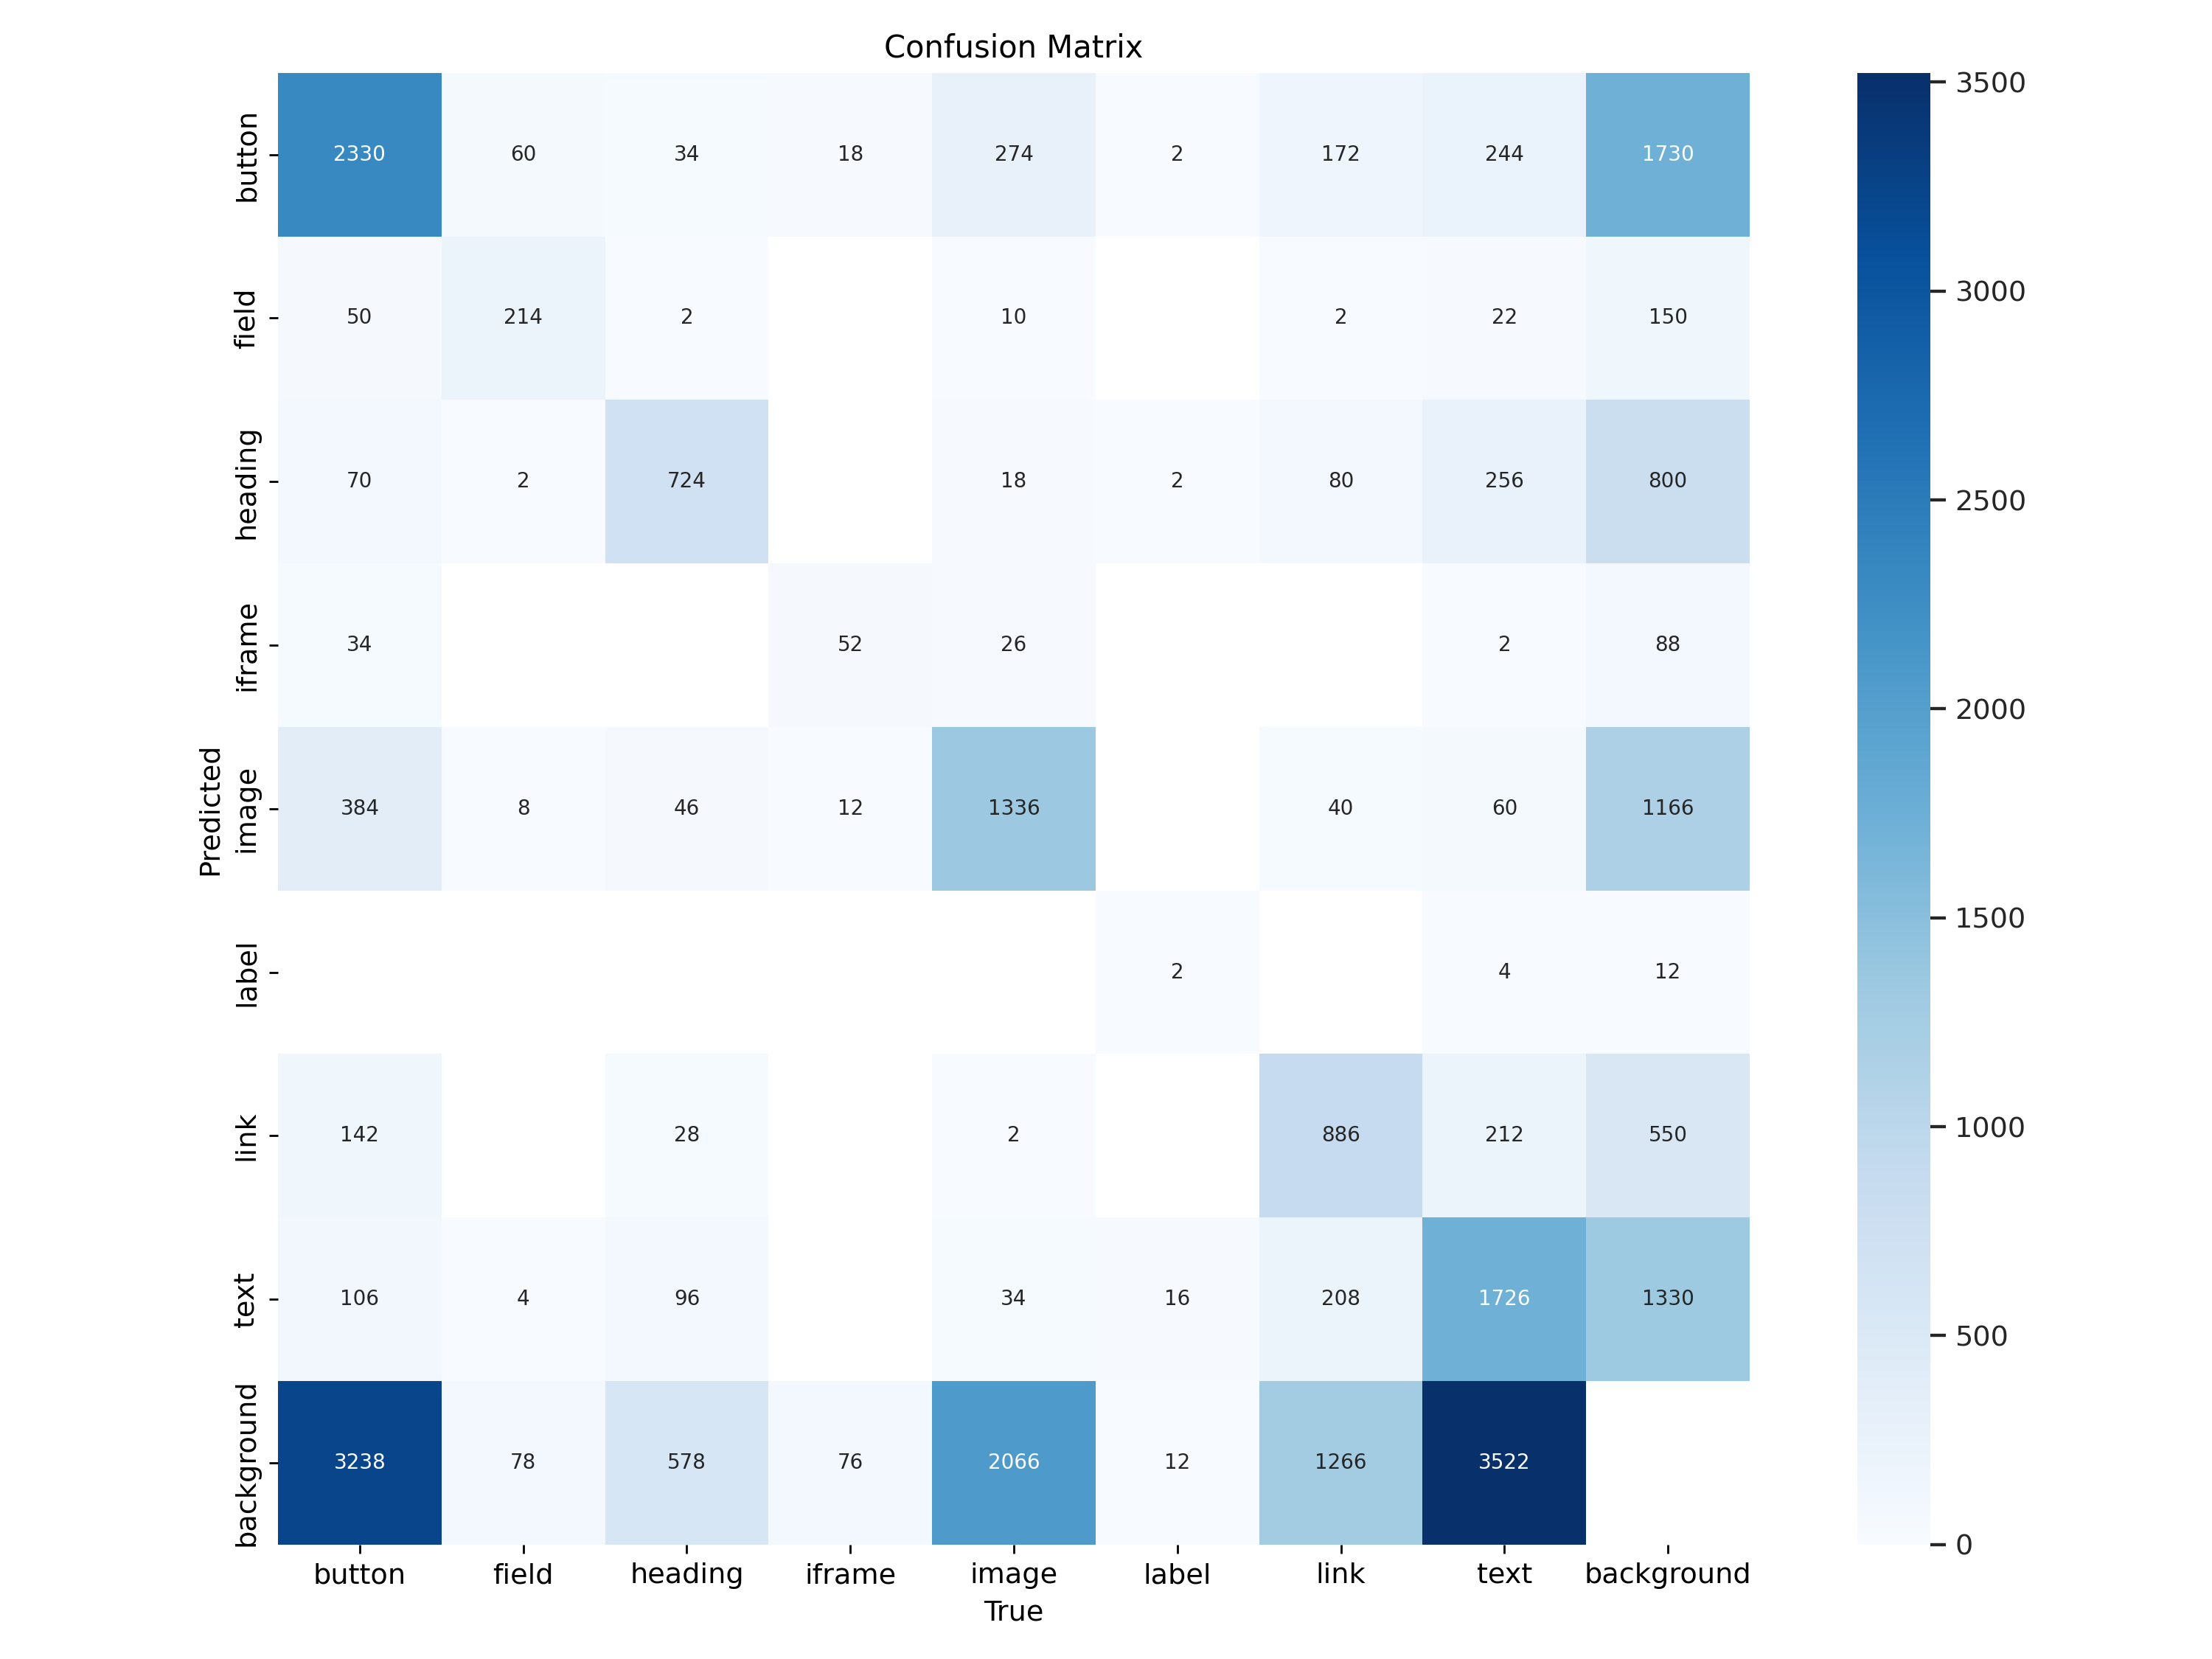

In [20]:
Image(filename=f'/content/runs/detect/val/confusion_matrix.png',width=600)

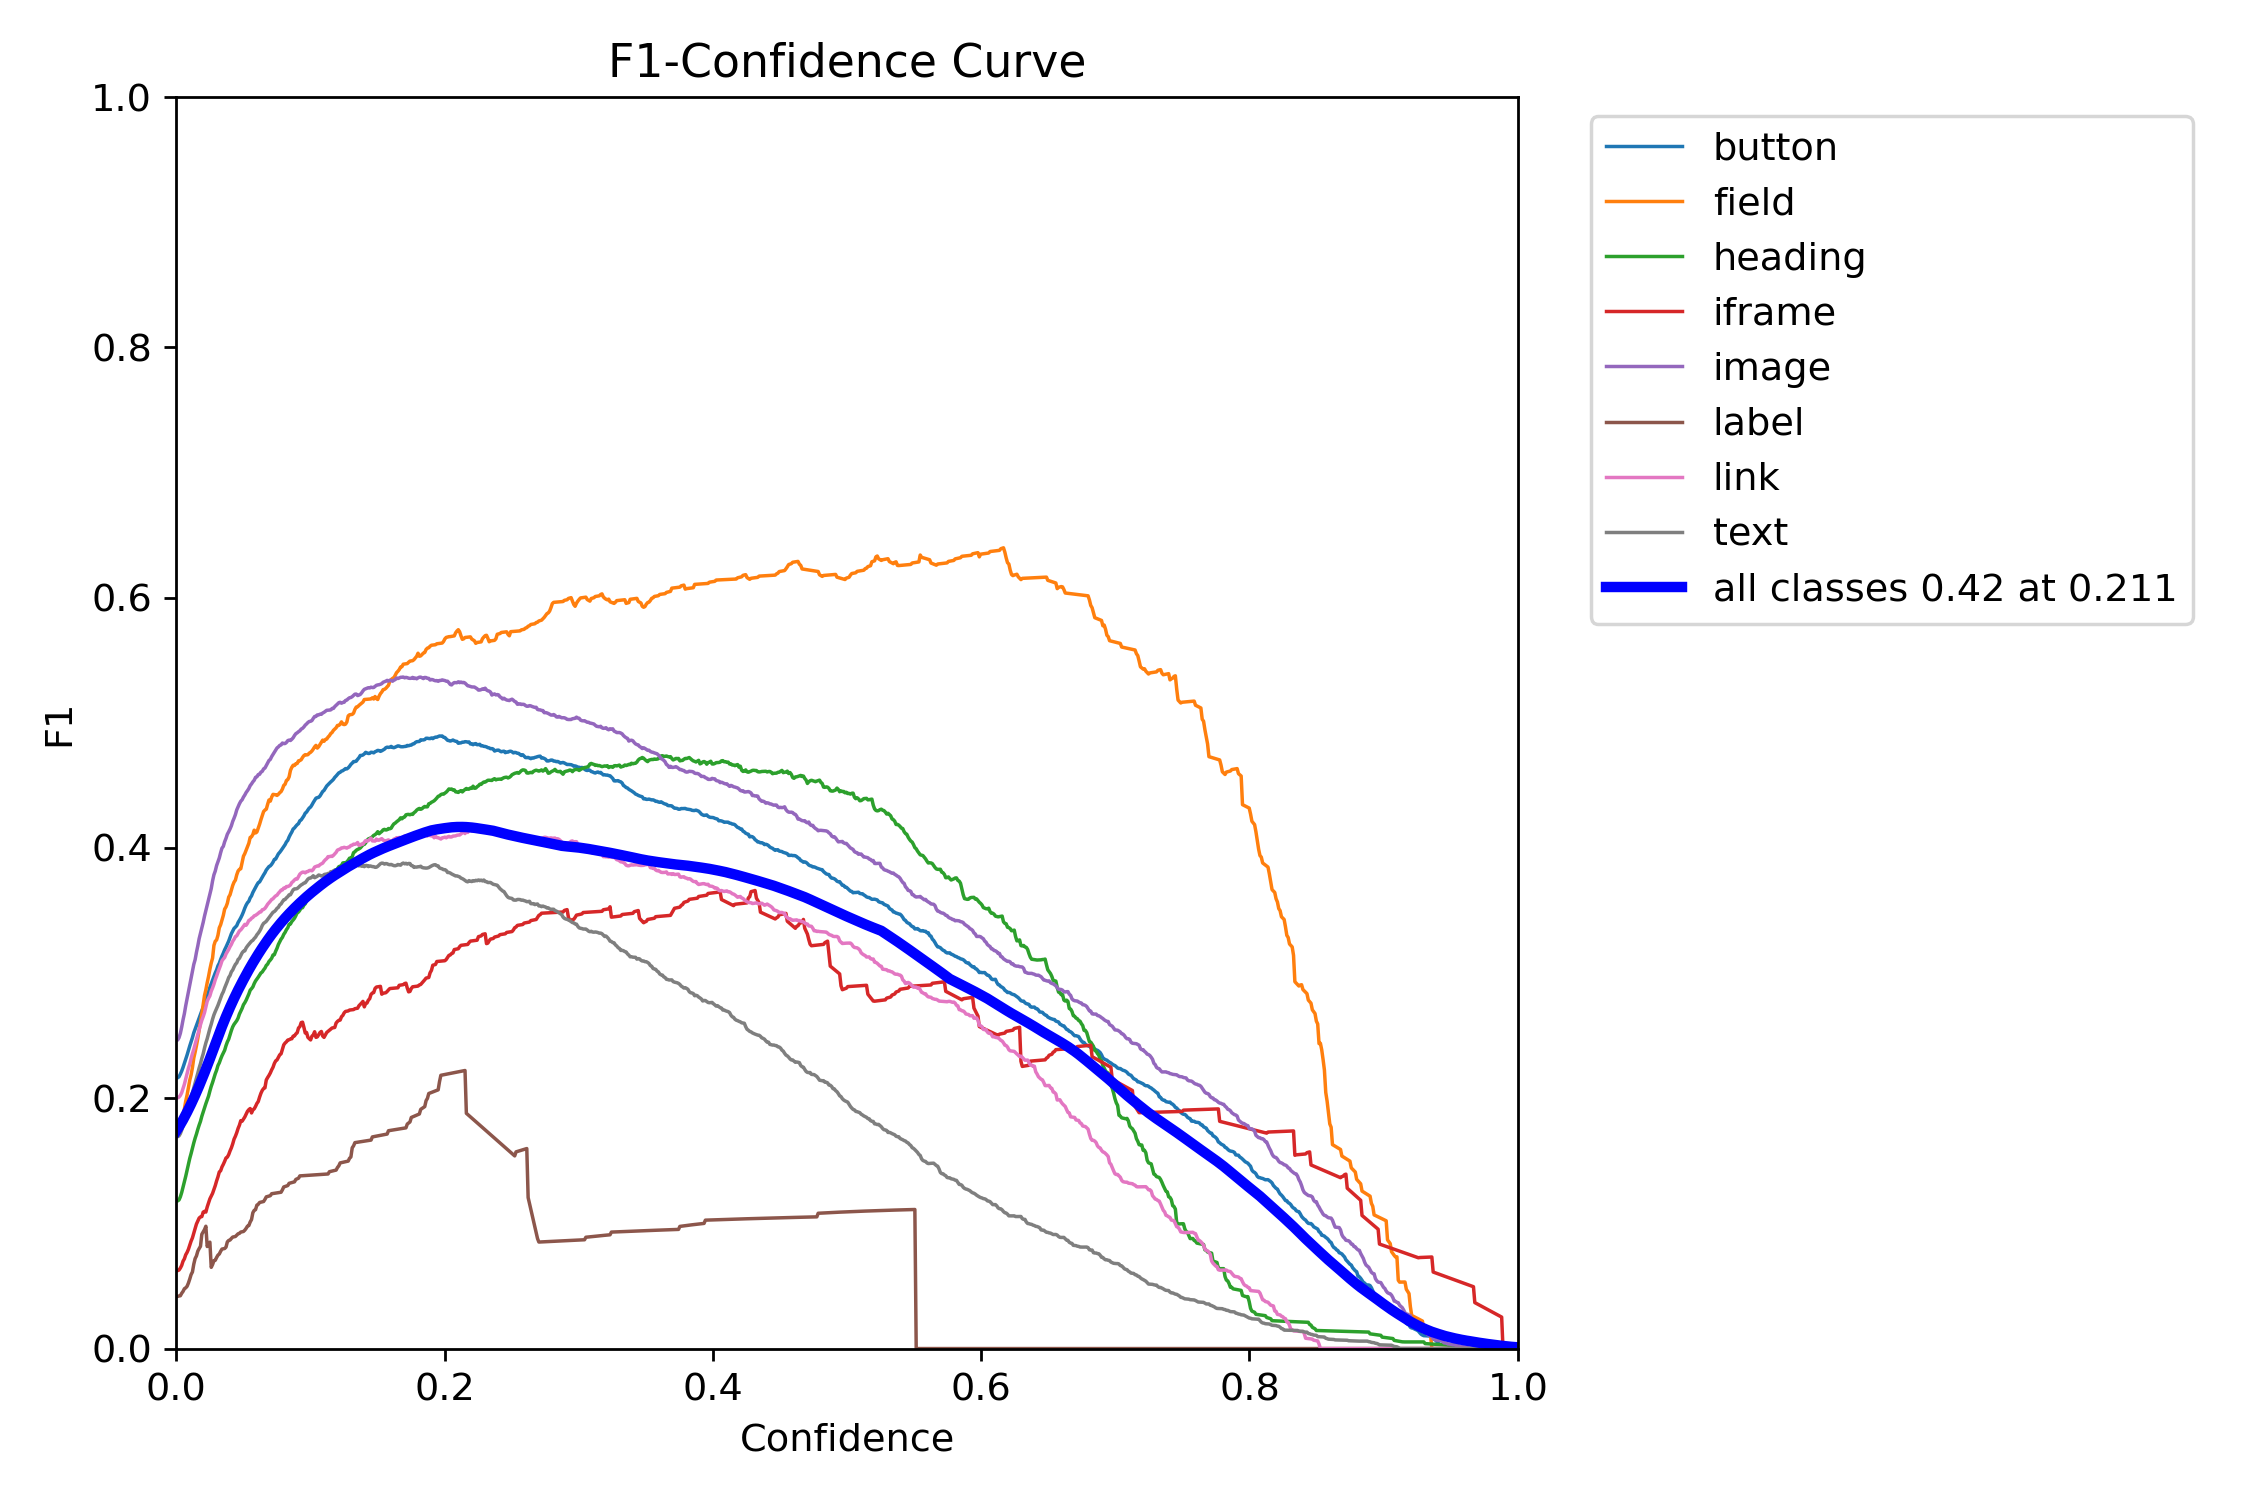

In [21]:
Image(filename=f'/content/runs/detect/val/confusion_matrix.png',width=600)

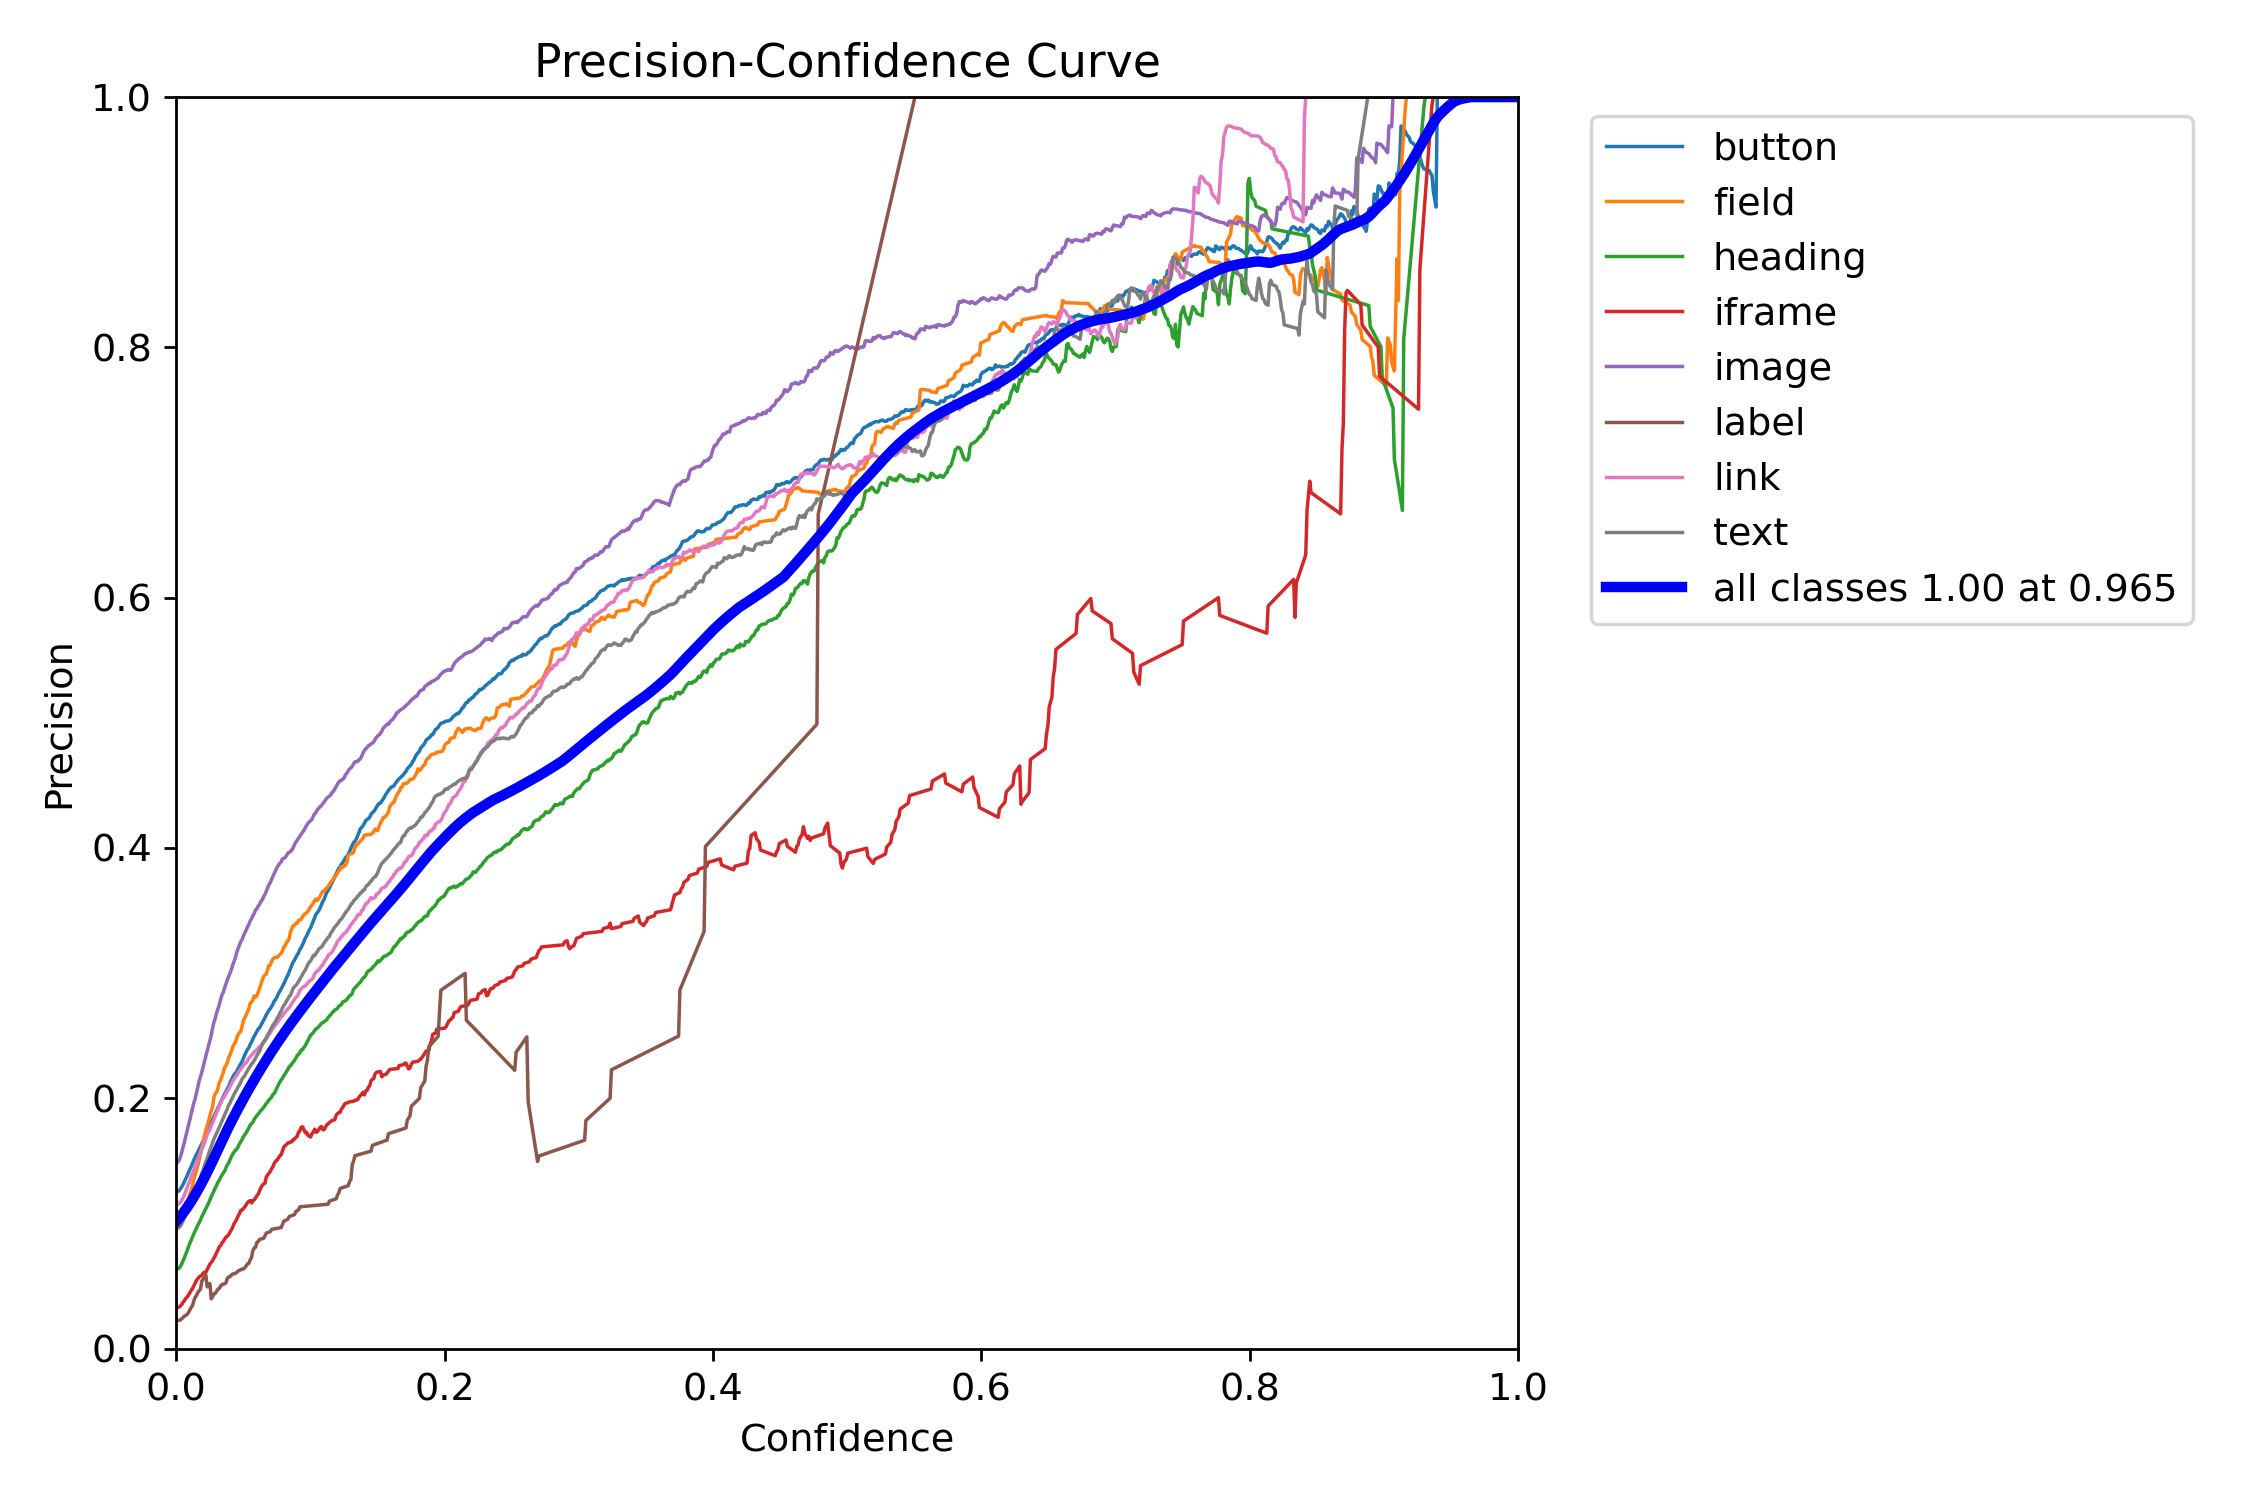

In [22]:
Image(filename=f'/content/runs/detect/val/P_curve.png',width=600)

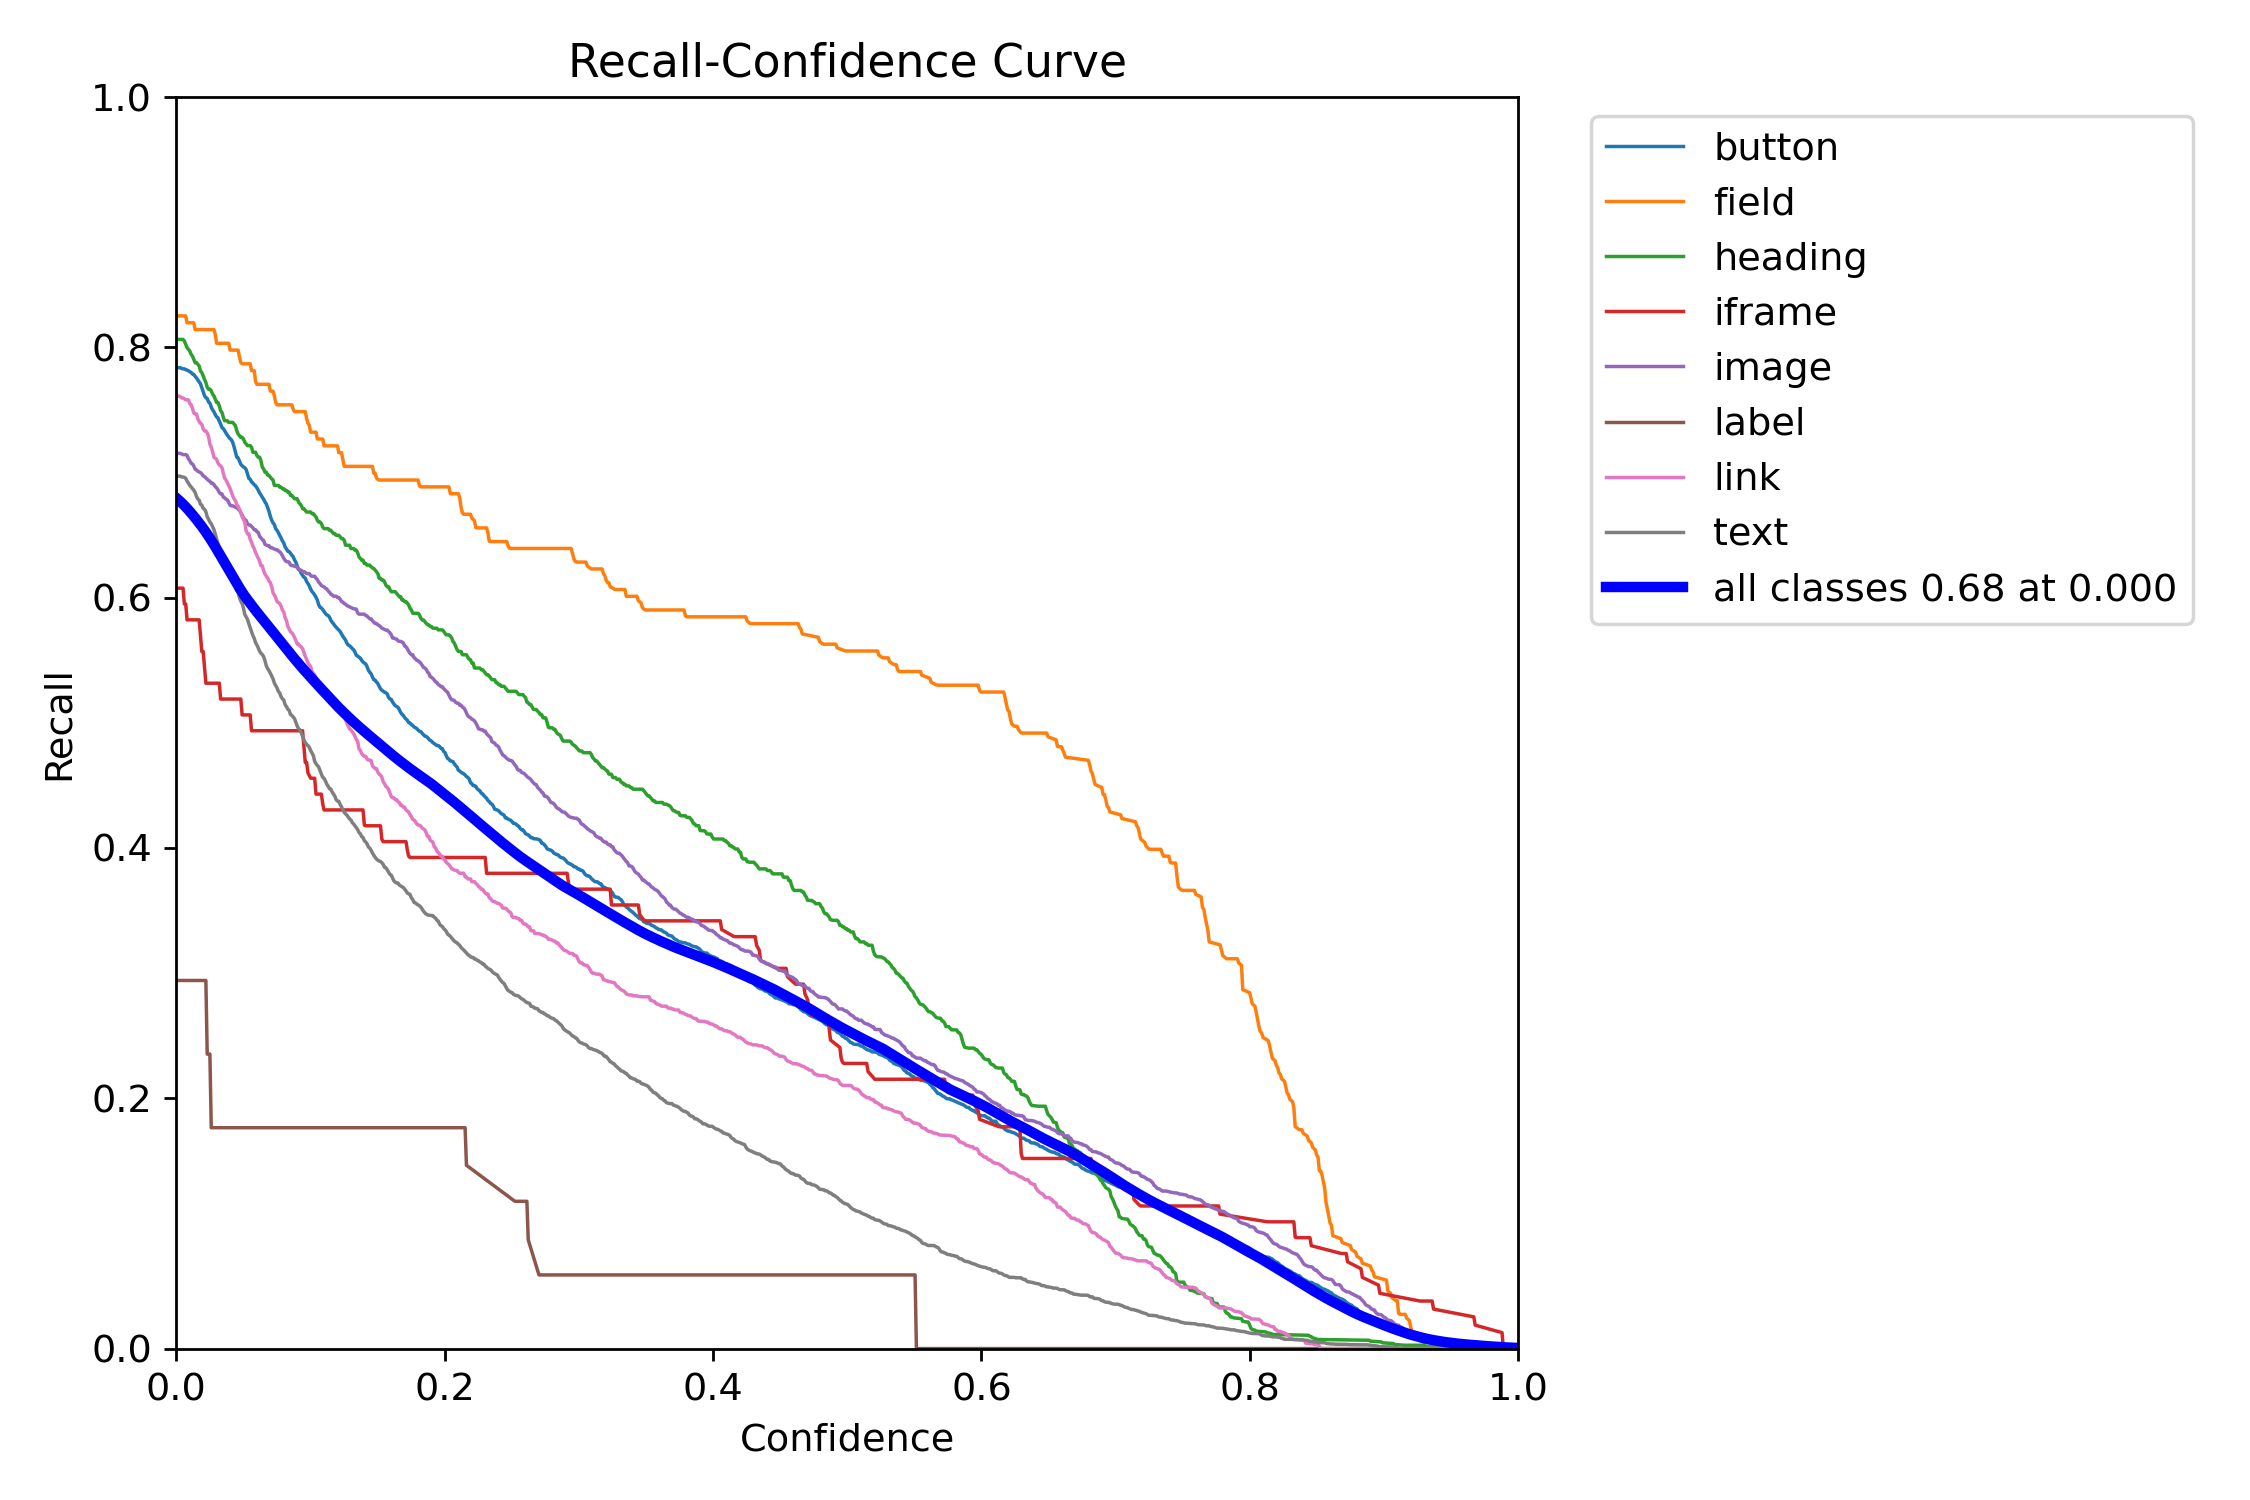

In [23]:
Image(filename=f'/content/runs/detect/val/R_curve.png',width=600)

# Prediction Mode

In [35]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt data='/content/Webpage elements detection/data.yaml'

WARNING ⚠️ 'source' argument is missing. Using default 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25844392 parameters, 0 gradients, 78.7 GFLOPs

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 3 images, 115.7ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 1 image, 122.4ms
Speed: 2.8ms preprocess, 119.0ms inference, 1020.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


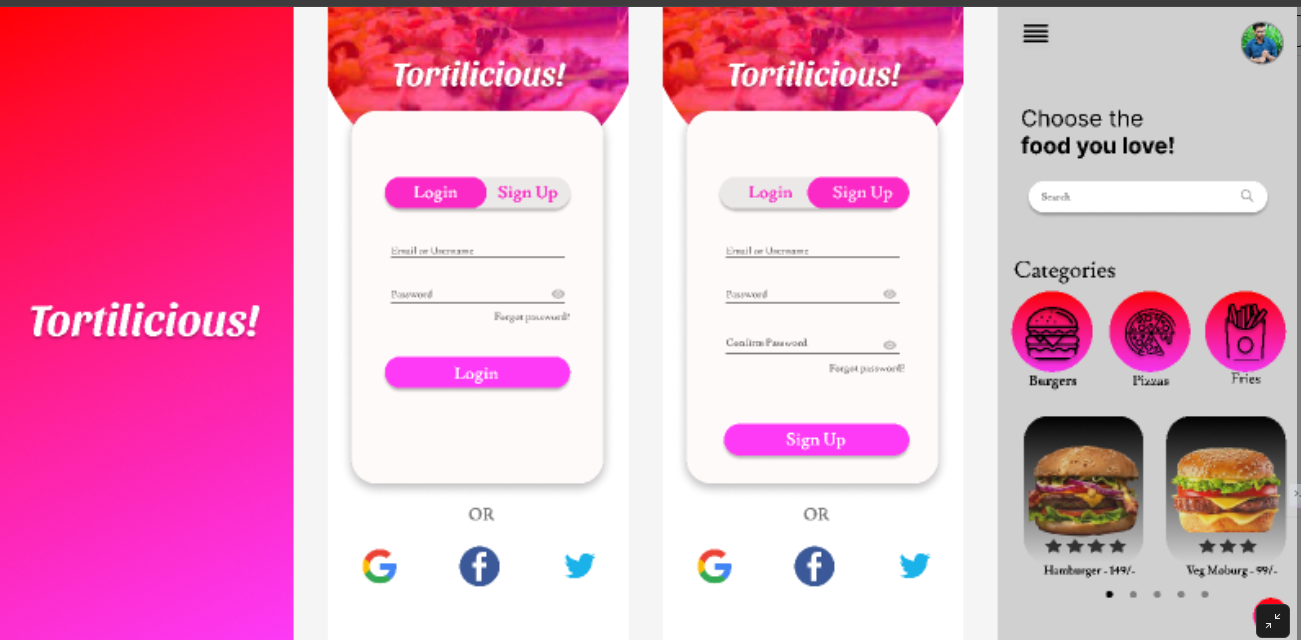

In [37]:
import glob
from IPython.display import Image , display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path , width=600))
  print('\n')

In [2]:
import cv2
import numpy as np

# Load the trained YOLO model
model_weights = '/content/runs/detect/train/weights/best.pt'
model_config = "/content/yolov8m.pt"
model = cv2.dnn.readNet(model_weights, model_config)

# Define the input size expected by the model
input_size = (640, 640)

# Function to preprocess and resize input image
def preprocess_image(image_path, input_size):
    # Read the image
    image = cv2.imread(image_path)
    # Resize the image to the input size expected by the model
    resized_image = cv2.resize(image, input_size)
    # Normalize pixel values to the range [0, 1]
    resized_image = resized_image.astype(np.float32) / 255.0
    # Return the preprocessed image
    return resized_image

# Function to perform inference and draw bounding boxes on the image
def predict_and_draw(image_path, model, input_size):
    # Preprocess the input image
    image = preprocess_image(image_path, input_size)
    # Create a blob from the preprocessed image
    blob = cv2.dnn.blobFromImage(image, 1/255.0, input_size, swapRB=True, crop=False)
    # Set the input to the model
    model.setInput(blob)
    # Perform inference
    outputs = model.forward()

    # Process the outputs and draw bounding boxes
    for detection in outputs:
        for detect in detection:
            scores = detect[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.5:  # Adjust confidence threshold as needed
                # Scale the bounding box coordinates to the original image size
                box = detect[0:4] * np.array([image.shape[1], image.shape[0], image.shape[1], image.shape[0]])
                (x, y, width, height) = box.astype("int")

                # Draw the bounding box on the original image
                cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)
                text = f"Class: {class_id}, Confidence: {confidence:.2f}"
                cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the image with bounding boxes
    cv2.imshow("Result", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Path to the custom input image
input_image_path = "/content/runs/detect/predict/test_image.jpg"

# Perform prediction and draw bounding boxes on the image
predict_and_draw(input_image_path, model, input_size)
